Выводит текст на изображение

In [24]:
import pytesseract 
import cv2

image = cv2.imread('text1.jpg')


text = pytesseract.image_to_string(image, lang='rus')
print(text)

config = r'--oem 3 --psm 6'
data = pytesseract.image_to_data(image, config=config, lang='rus')

# Перебираем данные про текстовые надписи
for i, el in enumerate(data.splitlines()):
	if i == 0:
		continue

	el = el.split()

	try:
		# Создаем подписи на картинке
		x, y, w, h = int(el[6]), int(el[7]), int(el[8]), int(el[9])
		cv2.putText(image, el[11], (x-5, y-5), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 255), 1)
	except IndexError:
		print("Операция была пропущена")

cv2.imshow('Input image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

 

= в
Я у профессора одного жил, который язык звереи изучал. Вот и
выучился. Сейчас без языка нельзя. Пропадёшь сразу, или из тебя
шапку сделают, или воротник, или просто коврик для ног.

 

Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена


Находит слово на изображении и обводит его в прямоугольник. 

A NEGATIVE MIND
WiILL NEVER GIVE you
— ‘A POSITIVE UFE



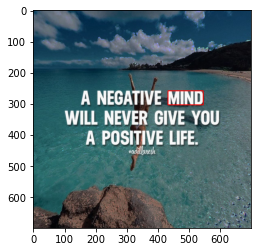

In [21]:
import matplotlib.pyplot as plt
from PIL import Image

image = cv2.imread('text2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

string = pytesseract.image_to_string(image, lang='eng')
# печатаем
print(string)

# чтобы нарисовать сделаем копию изображения
image_copy = image.copy()
# слово для поиска
target_word = "mind"
# получить все данные из изображения
data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

# получить все вхождения нужного слова
word_occurences = [ i for i, word in enumerate(data["text"]) if word.lower() == target_word ]


for occ in word_occurences:
    # извлекаем ширину, высоту, верхнюю и левую позицию для обнаруженного слова
    w = data["width"][occ]
    h = data["height"][occ]
    l = data["left"][occ]
    t = data["top"][occ]
    # определяем все точки окружающей рамки
    p1 = (l, t)
    p2 = (l + w, t)
    p3 = (l + w, t + h)
    p4 = (l, t + h)
    # рисуем 4 линии (прямоугольник)
    image_copy = cv2.line(image_copy, p1, p2, color=(255, 0, 0), thickness=2)
    image_copy = cv2.line(image_copy, p2, p3, color=(255, 0, 0), thickness=2)
    image_copy = cv2.line(image_copy, p3, p4, color=(255, 0, 0), thickness=2)
    image_copy = cv2.line(image_copy, p4, p1, color=(255, 0, 0), thickness=2)

plt.imsave("all_dog_words.png", image_copy)
plt.imshow(image_copy)
plt.show()